#Python Gaussian Analysis Tool (PyGauss)

PyGauss is designed to be an API for parsing one or more input/output files from a [Gaussian](http://www.gaussian.com/) quantum chemical computation and provide functionality to assess  **molecular geometry** and **electronic distribution** both visually and quantitatively.

It is built on top of the [cclib](http://cclib.github.io/)/[chemview](http://chemview.readthedocs.org/en/latest/)/[chemlab](http://chemlab.readthedocs.org/en/latest/index.html) suite of packages and python scientific stack and is primarily designed to be used interactively in the [IPython Notebook](http://ipython.org/notebook.html) (within which this readme was created). As shown below, a molecular optimisation can be assesed individually (much like in [gaussview](http://www.gaussian.com/g_prod/gv5b.htm)), but also as part of a group. The advantages of this package are then:

- Faster, more efficient analysis
- Reproducible analysis
- Trend analysis

##Instillation

- The source code is hosted on GitHub; https://github.com/chrisjsewell/PyGauss
- A PyPi distribution is available at; https://pypi.python.org/pypi/pygauss
- A Conda distribution is available at; https://conda.binstar.org/cjs14

###The Easy Way (OSX and Linux)

The recommended was to use pygauss is to download the [Anaconda](http://continuum.io/downloads) Scientific Python Distribution (64-bit). Once downloaded a new environment can be created in terminal and pygauss installed:

    conda create -n pg_env python=2.7
    conda install -c https://conda.binstar.org/cjs14 -n pg_env pygauss

###The Hard Way (Windows)

There is currently no pygauss conda distributable for Windows or for chemlab, which has C-extensions that need to be built using a compiler. Therefore it will need to be cloned from GitHub. the extensions built, dependancies installed and finally installed.

    conda create -n pg_env python=2.7
	conda install -n pg_env -c https://conda.binstar.org/cjs14 cclib
    conda install -n pg_env -c https://conda.binstar.org/cjs14 chemview
    conda install -n pg_env -c https://conda.binstar.org/cjs14 pyopengl		
	git clone --recursive https://github.com/chemlab/chemlab.git
	cd chemlab
	python setup.py build_ext --inplace
    conda install -n pg_env <pil, pandas, matplotlib, scikit-learn, ...> 
    activate pg_env
    pip install . # or add to PYTHONPATH
    pip install pygauss
    
If you encounter difficulties it may be useful for you to look in [working_conda_environments](https://github.com/chrisjsewell/PyGauss/tree/master/working_conda_environments) at conda environments known to work.

##Example Assessment

You should then be able to open an assessment in IPython Notebook starting with the following:

In [27]:
from IPython.display import display
%matplotlib inline
import pygauss as pg
print 'pygauss version: {}'.format(pg.__version__)

pygauss version: 0.4.0


and access the test folder with a number of example Gaussian outputs.

In [28]:
folder = pg.get_test_folder()
len(folder.list_files())

33

**Note:** the *folder* object will act identical whether using a local path or one on a server over ssh (using [paramiko](http://www.paramiko.org/)):

    folder = pg.Folder('/path/to/folder', 
                    ssh_server='login.server.com',
                    ssh_username='username')

###Single Molecule Analysis

A *molecule* can be created containg data about the inital geometry, optimisation process and analysis of the final configuration. Molecules can be viewed statically or interactively (not currently supported by Firefox).

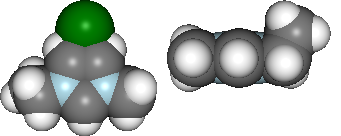

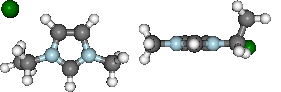

In [29]:
mol = pg.molecule.Molecule(folder_obj=folder,
                init_fname='CJS1_emim-cl_B_init.com', 
                opt_fname=['CJS1_emim-cl_B_6-311+g-d-p-_gd3bj_opt-modredundant_difrz.log',
                           'CJS1_emim-cl_B_6-311+g-d-p-_gd3bj_opt-modredundant_difrz_err.log',
                           'CJS1_emim-cl_B_6-311+g-d-p-_gd3bj_opt-modredundant_unfrz.log'],
                freq_fname='CJS1_emim-cl_B_6-311+g-d-p-_gd3bj_freq_unfrz.log',
                nbo_fname='CJS1_emim-cl_B_6-311+g-d-p-_gd3bj_pop-nbo-full-_unfrz.log', 
                atom_groups={'emim':range(20), 'cl':[20]},
                alignto=[3,2,1])

#mol.show_initial(active=True)
display(mol.show_initial(represent='vdw', rotations=[[0,0,90], [-90, 90, 0]]))
display(mol.show_optimisation(represent='ball_stick', rotations=[[0,0,90], [-90, 90, 0]]))

Basic analysis of optimisation...

Optimised? True, Conformer? True, Energy = -805.105 a.u.


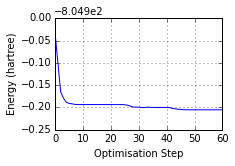

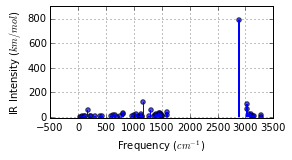

In [30]:
print('Optimised? {0}, Conformer? {1}, Energy = {2} a.u.'.format(
    mol.is_optimised(), mol.is_conformer(), 
    round(mol.get_optimisation_E(units='hartree'),3)))
ax = mol.plot_optimisation_E(units='hartree')
ax.get_figure().set_size_inches(3, 2)
ax = mol.plot_freq_analysis()
ax.get_figure().set_size_inches(4, 2)

Geometric analysis...

Cl optimised polar coords from aromatic ring : (0.11, -116.42,-170.06)


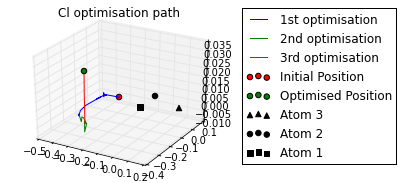

In [31]:
print 'Cl optimised polar coords from aromatic ring : ({0}, {1},{2})'.format(
    *[round(i, 2) for i in mol.calc_polar_coords_from_plane(20,3,2,1)])
ax = mol.plot_opt_trajectory(20, [3,2,1])
ax.set_title('Cl optimisation path')
ax.get_figure().set_size_inches(4, 3)

Potential Energy Scan analysis of geometric conformers...

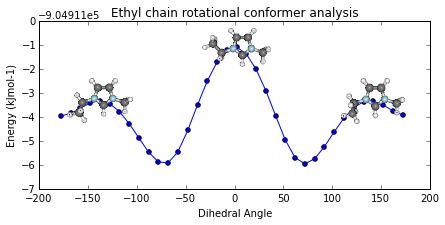

In [32]:
mol2 = pg.molecule.Molecule(folder_obj=folder, alignto=[3,2,1],
            pes_fname=['CJS_emim_6311_plus_d3_scan.log', 
                       'CJS_emim_6311_plus_d3_scan_bck.log'])   
ax = mol2.plot_pes_scans([1,4,9,10], rotation=[0,0,90], img_pos='local_maxs', zoom=0.5)
ax.set_title('Ethyl chain rotational conformer analysis')
ax.get_figure().set_size_inches(7, 3)

Natural Bond Orbital and Second Order Perturbation Theory analysis...

+ve charge centre polar coords from aromatic ring: (0.02 -51.77,-33.15)


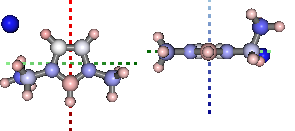

In [33]:
print '+ve charge centre polar coords from aromatic ring: ({0} {1},{2})'.format(
    *[round(i, 2) for i in mol.calc_nbo_charge_center(3, 2, 1)])
display(mol.show_nbo_charges(represent='ball_stick', axis_length=0.4, 
                              rotations=[[0,0,90], [-90, 90, 0]]))

H inter-bond energy = 111.7128 kJmol-1
Other inter-bond energy = 11.00392 kJmol-1


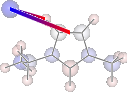

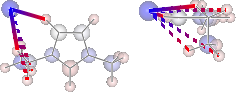

In [34]:
print 'H inter-bond energy = {} kJmol-1'.format(
        mol.calc_hbond_energy(eunits='kJmol-1', atom_groups=['emim', 'cl']))
print 'Other inter-bond energy = {} kJmol-1'.format(
    mol.calc_sopt_energy(eunits='kJmol-1', no_hbonds=True, atom_groups=['emim', 'cl']))
display(mol.show_sopt_bonds(min_energy=1, eunits='kJmol-1',
                            atom_groups=['emim', 'cl'],
                            no_hbonds=True,
                            rotations=[[0, 0, 90]]))
display(mol.show_hbond_analysis(cutoff_energy=5.,alpha=0.6, 
                                atom_groups=['emim', 'cl'],
                                rotations=[[0, 0, 90], [90, 0, 0]]))

###Multiple Computations Analysis

Multiple computations, for instance of different starting conformations, can be grouped into an *Analysis* class. 

Figure: (A) emim, cl, B, (B) emim, cl, BE, (C) emim, cl, BM, (D) emim, cl, F, (E) emim, cl, FE


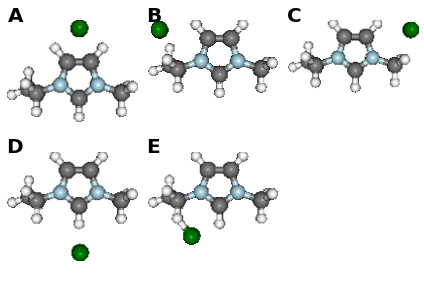

In [35]:
analysis = pg.Analysis(folder_obj=folder)
errors = analysis.add_runs(headers=['Cation', 'Anion', 'Initial'], 
                               values=[['emim'], ['cl'],
                                       ['B', 'BE', 'BM', 'F', 'FE']],
            init_pattern='*{0}-{1}_{2}_init.com',
            opt_pattern='*{0}-{1}_{2}_6-311+g-d-p-_gd3bj_opt*unfrz.log',
            freq_pattern='*{0}-{1}_{2}_6-311+g-d-p-_gd3bj_freq*.log',
            nbo_pattern='*{0}-{1}_{2}_6-311+g-d-p-_gd3bj_pop-nbo-full-*.log',
            alignto=[3,2,1], atom_groups={'emim':range(20), 'cl':[20]})

fig, caption = analysis.plot_mol_images(mtype='initial', max_cols=3,
                        info_columns=['Cation', 'Anion', 'Initial'],
                        rotations=[[0,0,90]])
print caption

The methods mentioned for indivdiual molecules can then be applied to all or a subset of these computations.

In [36]:
analysis.add_mol_property_subset('Opt', 'is_optimised', rows=[2,3])
analysis.add_mol_property('Energy (au)', 'get_optimisation_E', units='hartree')
analysis.add_mol_property('Cation chain, $\\psi$', 'calc_dihedral_angle', [1, 4, 9, 10])
analysis.add_mol_property('Cation Charge', 'calc_nbo_charge', 'emim')
analysis.add_mol_property('Anion Charge', 'calc_nbo_charge', 'cl')
analysis.add_mol_property(['Anion-Cation, $r$', 'Anion-Cation, $\\theta$', 'Anion-Cation, $\\phi$'], 
                               'calc_polar_coords_from_plane', 3, 2, 1, 20)
analysis.add_mol_property('Anion-Cation h-bond', 'calc_hbond_energy', 
                          eunits='kJmol-1', atom_groups=['emim', 'cl'])
tbl = analysis.get_table(row_index=['Anion', 'Cation', 'Initial'], 
                   column_index=['Cation', 'Anion', 'Anion-Cation'])

**NEW FEATURE:** there is now an option (requiring [pdflatex](http://www.tug.org/applications/pdftex/) and [ghostscript](http://www.ghostscript.com/download/gsdnld.html)+[imagemagik](http://www.imagemagick.org/script/binary-releases.php)) to output the tables as a latex formatted image.

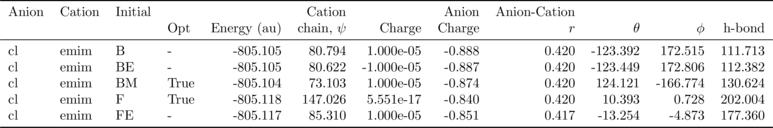

In [37]:
analysis.get_table(row_index=['Anion', 'Cation', 'Initial'],
                   column_index=['Cation', 'Anion', 'Anion-Cation'],
                   as_image=True, font_size=12)

RadViz is a way of visualizing multi-variate data.

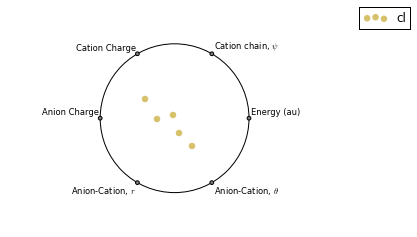

In [38]:
ax = analysis.plot_radviz_comparison('Anion', columns=range(4, 10))

The KMeans algorithm clusters data by trying to separate samples into n groups of equal variance.

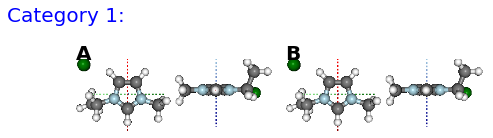

Figure: (A) B, (B) BE


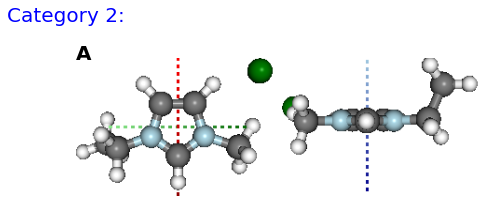

Figure: (A) BM


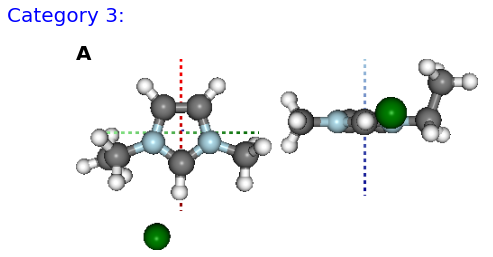

Figure: (A) FE


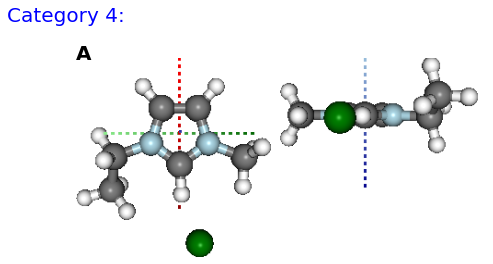

Figure: (A) F


In [39]:
pg.utils.imgplot_kmean_groups(
    analysis, 'Anion', 'cl', 4, range(4, 10), 
    output=['Initial'], mtype='optimised', 
    rotations=[[0, 0, 90], [-90, 90, 0]],
    axis_length=0.3)

MORE TO COME!!